<a href="https://colab.research.google.com/github/fahmidjobbi/TP-COLLAB/blob/main/NLP_LDA_Reddit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Clean_Data_NLP.csv')

# print the first 5 rows of the DataFrame

df


,Title,Post Text,Subreddit,Post_lemmatized
0,VVTokens: Financial Services More Accessible,The​ ​Token​ ​to Make Electronic Financial Ser...,startup,"['make', 'electronic', 'financial', 'service',..."
1,We just raised USD 30M to make Contra the plat...,https://www.reddit.com/r/startups/comments/lqp...,startup,[]
2,I built a website that teaches anyone who has ...,I've been working with all kinds of early-stag...,startup,"['ve', 'work', 'kind', 'earlystage', 'startup'..."
3,"We made $2,5M with content marketing",This is a true story!\n\nThe backbone of our c...,startup,"['true', 'story', 'backbone', 'company', 'succ..."
4,After more than a year of design & coding we l...,Logology ([https://www.logology.co](https://ww...,startup,"['logology', 'httpswwwlogologycohttpswwwlogolo..."
...,...,...,...,...
25175,Adding r/baseball as a default community for t...,The baseball postseason is already underway! A...,announcements,"['baseball', 'postseason', 'already', 'underwa..."
25176,Sunsetting Secret Santa and Reddit Gifts,Today is a difficult one:. 2021 will be the la...,announcements,"['today', 'difficult', 'last', 'year', 'reddit..."
25177,New addition to site-wide rules regarding the ...,Hello All—\n\nWe want to let you know that we ...,announcements,"['want', 'let', 'know', 'make', 'new', 'additi..."
25178,"Debate, dissent, and protest on Reddit",Hey everyone–\n\nThe pandemic has been extreme...,announcements,"['pandemic', 'extremely', 'hard', 'many', 'bel..."


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Shuffle the rows of the DataFrame
df = df.sample(frac=1, random_state=42)

# Split the DataFrame into training and testing subsets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)




In [ ]:
print(train_df.shape)
print(test_df.shape)

(20144, 4)
(5036, 4)


In [ ]:
# Common data handling libraries
import os
import string
import pandas as pd
import numpy as np
import glob
import pickle

# Gensim for LDA
import gensim

# NLTK for test processing
import nltk
nltk.download('stopwords')

# spacy for Lemmatization
import spacy

# Visualization
import matplotlib.pyplot as plt

# Deep learning modeling
import keras

# Model evaluation metrics
import sklearn

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import gensim
import pandas as pd


# Split the strings in 'Post_lemmatized' column into lists of tokens
train_df['Post_lemmatized'] = train_df['Post_lemmatized'].apply(lambda x: x.split())

# Create Dictionary
id2word = gensim.corpora.Dictionary(train_df['Post_lemmatized'])

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in train_df['Post_lemmatized']]

# View
print(corpus[:1])

# Human readable format of corpus (term-frequency)
print([[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]])


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 11), (24, 1), (25, 1), (26, 1), (27, 3), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 3), (41, 1), (42, 2), (43, 1), (44, 1), (45, 4), (46, 1), (47, 1), (48, 3), (49, 1), (50, 1), (51, 1), (52, 2), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 3), (64, 2), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 3), (76, 1), (77, 1), (78, 2), (79, 1), (80, 2), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 2), (91, 1), (92, 1), (93, 1), (94, 1), (95, 2), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 4), (104, 1), (105, 1), (106, 2), (107, 1), (108, 1)]]
[[("'adviceguida

In [ ]:
import gensim
import pandas as pd
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense


# Train LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=5, passes=10)




In [ ]:
# Compute coherence score
coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, texts=train_df['Post_lemmatized'], dictionary=id2word, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()

# Compute perplexity score
perplexity_score = lda_model.log_perplexity(corpus)

# Print the scores
print("Coherence Score:", coherence_score)
print("Perplexity Score:", perplexity_score)


Coherence Score: 0.4368441171880728
Perplexity Score: -7.270399936712759


In [ ]:
# Extract LDA topic features for each post
lda_features = []
for text in df['Post_lemmatized']:
    tokens = text.split()  # convert text string to list of tokens
    lda_topic_probs = lda_model.get_document_topics(id2word.doc2bow(tokens), minimum_probability=0)
    lda_topic_probs = [p for _, p in lda_topic_probs]
    lda_features.append(lda_topic_probs)

# Preprocess text data for CNN
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['Post_lemmatized'])
sequences = tokenizer.texts_to_sequences(df['Post_lemmatized'])
X = pad_sequences(sequences, maxlen=500)

# Train CNN model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=100, input_length=500))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(units=5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, pd.get_dummies(df['Subreddit']), batch_size=64, epochs=25, validation_split=0.1)



Epoch 1/25
355/355 [==============================] - 91s 253ms/step - loss: 0.2871 - accuracy: 0.9212 - val_loss: 0.0297 - val_accuracy: 0.9940
Epoch 2/25
355/355 [==============================] - 89s 252ms/step - loss: 0.0113 - accuracy: 0.9977 - val_loss: 0.0180 - val_accuracy: 0.9964
Epoch 3/25
355/355 [==============================] - 89s 251ms/step - loss: 0.0067 - accuracy: 0.9986 - val_loss: 0.0140 - val_accuracy: 0.9964
Epoch 4/25
355/355 [==============================] - 88s 247ms/step - loss: 0.0060 - accuracy: 0.9986 - val_loss: 0.0142 - val_accuracy: 0.9964
Epoch 5/25
355/355 [==============================] - 89s 251ms/step - loss: 0.0055 - accuracy: 0.9986 - val_loss: 0.0138 - val_accuracy: 0.9964
Epoch 6/25
355/355 [==============================] - 89s 251ms/step - loss: 0.0054 - accuracy: 0.9986 - val_loss: 0.0142 - val_accuracy: 0.9964
Epoch 7/25
355/355 [==============================] - 88s 248ms/step - loss: 0.0055 - accuracy: 0.9986 - val_loss: 0.0135 - val_ac

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Preprocess text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['Post_lemmatized'])
sequences = tokenizer.texts_to_sequences(df['Post_lemmatized'])
X = pad_sequences(sequences, maxlen=500)

# Convert labels to integer indices
y = pd.factorize(df['Subreddit'])[0]

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train Decision Tree model with depth = 1
modelTree = DecisionTreeClassifier(max_depth=7, random_state=42)
modelTree.fit(X_train, y_train)

# Predict the response for test dataset
y_predT = modelTree.predict(X_test)

# Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_predT))



Accuracy: 0.6552819698173153


In [ ]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts

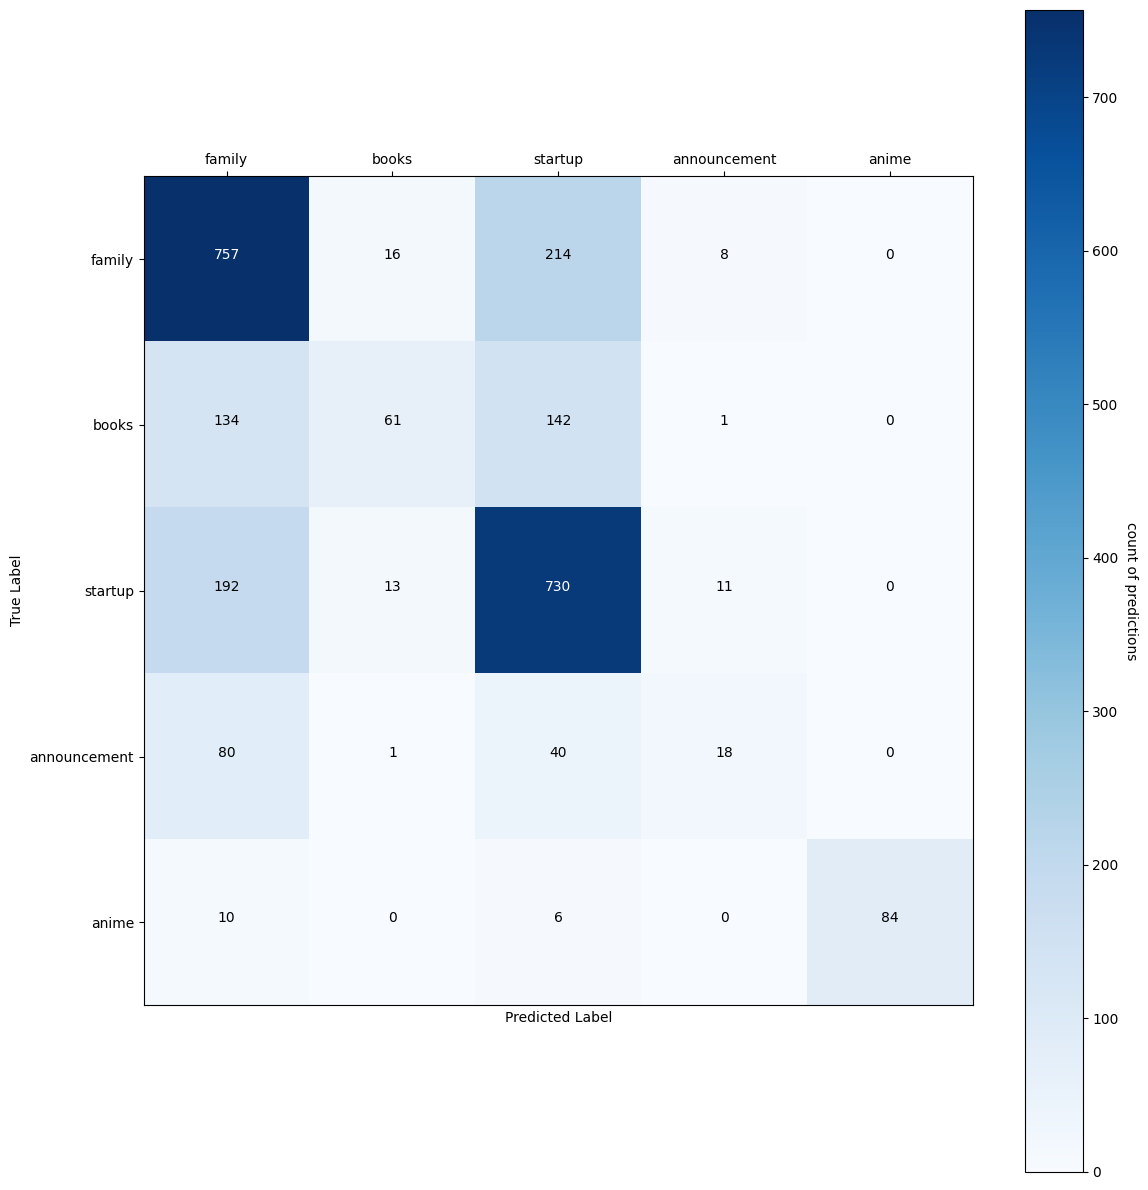

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

labels = ['family', 'books', 'startup', 'announcement', 'anime']
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predT)
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_predT ))

              precision    recall  f1-score   support

           0       0.65      0.76      0.70       995
           1       0.67      0.18      0.28       338
           2       0.64      0.77      0.70       946
           3       0.47      0.13      0.20       139
           4       1.00      0.84      0.91       100

    accuracy                           0.66      2518
   macro avg       0.69      0.54      0.56      2518
weighted avg       0.65      0.66      0.63      2518



In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


# Convert target labels to one-hot encoded format
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
y_predT_bin = label_binarize(y_predT, classes=[0, 1, 2, 3, 4])
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_predT_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Create a DataFrame for the ROC curve data
roc_df = pd.DataFrame({
    'False Positive Rate': fpr[0],
    'True Positive Rate': tpr[0],
    'Class': 0,
    'Area': roc_auc[0]
})
for i in range(1, 5):
    roc_df = pd.concat([roc_df, pd.DataFrame({
        'False Positive Rate': fpr[i],
        'True Positive Rate': tpr[i],
        'Class': i,
        'Area': roc_auc[i]
    })], axis=0)

# Create an interactive plot using plotly.express and plotly.graph_objects
fig = px.line(roc_df, x='False Positive Rate', y='True Positive Rate', color='Class', hover_data=['Area'])
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], name='Random Classifier', line=dict(dash='dash')))
fig.update_layout(title='Receiver Operating Characteristic (ROC) Curve', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')
fig.show()


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

lda_featuress = np.array(lda_features)
# Reduce dimensionality using t-SNE
tsne_model = TSNE(n_components=2, random_state=42, verbose=1)
tsne_lda = tsne_model.fit_transform(lda_featuress)



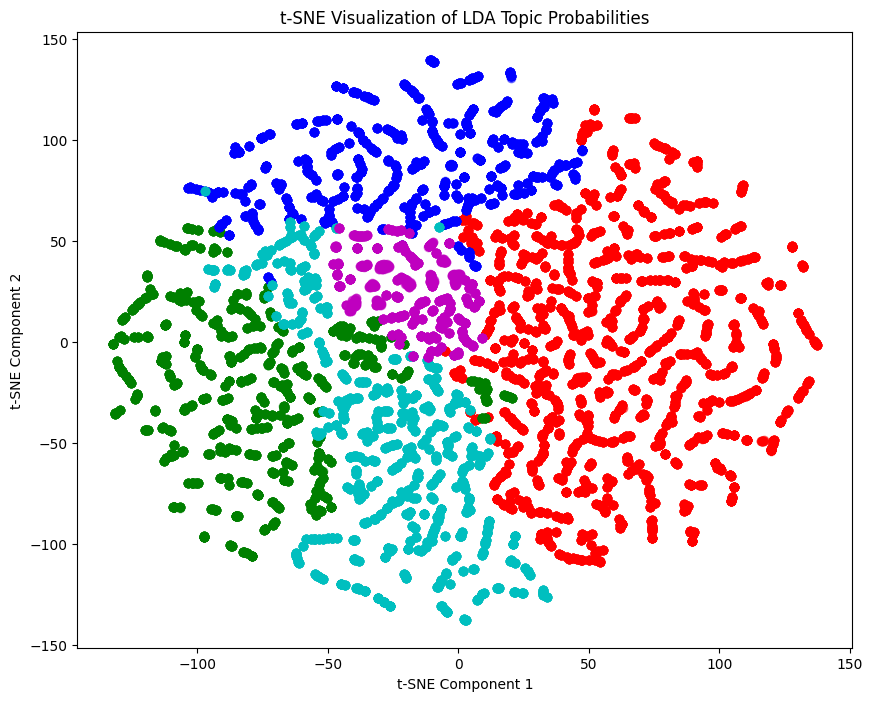

In [ ]:
# Get the dominant topic for each post
dominant_topic = np.argmax(lda_features, axis=1)

# Define colors for each topic
colors = ['r', 'g', 'b', 'c', 'm']

# Plot the t-SNE result with different colors for each topic
fig, ax = plt.subplots(figsize=(10, 8))
for i in range(len(colors)):
    ax.scatter(tsne_lda[dominant_topic==i, 0], tsne_lda[dominant_topic==i, 1], alpha=0.5, c=colors[i])
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_title('t-SNE Visualization of LDA Topic Probabilities')
plt.show()

In [ ]:
# Evaluate model performance on holdout set
X_test = pad_sequences(tokenizer.texts_to_sequences(test_df['Post_lemmatized']), maxlen=500)
y_pred = model.predict(X_test)


158/158 [==============================] - 5s 31ms/step


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode topic labels as integers
label_encoder = LabelEncoder()
test_df['Subreddit_encoder'] = label_encoder.fit_transform(test_df['Subreddit'])


from keras.utils import to_categorical

# Convert target labels to one-hot encoded format
y_test = to_categorical(test_df['Subreddit_encoder'], num_classes=5)
# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

158/158 [==============================] - 6s 40ms/step - loss: 0.0048 - accuracy: 0.9988
Test loss: 0.004788827616721392
Test accuracy: 0.9988085627555847


In [ ]:
post = '''	I spent the last 12 months in a remote wilderness lodge with no internet
 and cell service, and spent all my time reading. I did a ranking and mini-reviews of the 40ish books I read in that time '''


def clean_text(data):

    # convert to lower case
    data = [word.lower() for word in data.split()]

    # prepare translation table for removing punctuation
    table = str.maketrans('', '', string.punctuation)
    # remove punctuation from each word
    data = [word.translate(table) for word in data]

    # remove tokens with numbers in them
    data = [word for word in data if word.isalpha()]

    # remove stopwords
    data = [word for word in data if word not in nltk.corpus.stopwords.words('english')]

    return data


post=  clean_text(post)

import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

allowed_postags = ['NOUN', 'ADJ', 'VERB', 'ADV']
lemmatized_posts = []
for pos in post:
    doc = nlp(pos)
    lemmatized_post = [word.lemma_ for word in doc if word.pos_ in allowed_postags]
    lemmatized_posts.append(lemmatized_post)

post=lemmatized_posts
post = [' '.join(sublist) for sublist in post]
post=str(post)
print(post)


['spend', 'last', 'month', 'remote', 'wilderness', 'lodge', 'internet', 'cell', 'service', 'spend', 'time', 'read', 'rank', 'minireview', 'book', 'read', 'time']


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
#from sklearn.preprocessing import LabelEncoder
#from keras.preprocessing.text import Tokenizer

# Encode topic labels as integers
#label_encoder = LabelEncoder()

#tokenizer = Tokenizer(num_words=10000)
#tokenizer.fit_on_texts(df['Post_lemmatized'])
# Tokenize and pad the post
post_tokens = tokenizer.texts_to_sequences([post])
post_tokens_padded = pad_sequences(post_tokens, maxlen=500)

# Make prediction with model
prediction = model.predict(post_tokens_padded)
print(prediction)
# Print predicted topic
predicted_topic = label_encoder.inverse_transform([prediction.argmax()])[0]
print("Predicted topic:", predicted_topic)



1/1 [==============================] - 0s 20ms/step
[[7.0682617e-08 1.5034338e-08 9.9999511e-01 1.8991492e-11 4.7996091e-06]]
Predicted topic: books


In [ ]:
post_tokens

[[136, 76, 59, 1151, 7070, 7851, 619, 3307, 211, 136, 4, 25, 1245, 16, 25, 4]]

In [ ]:
test_df

,Title,Post Text,Subreddit,Post_lemmatized,Subreddit_encoder
3776,Sustainable fashion. Any thoughts?,Hi!\n\nFor a university project we are doing a...,startup,"['university', 'project', 'market', 'research'...",4
24799,An old team at reddit,Ellen Pao resigned from reddit today by mutual...,announcements,"['resign', 'reddit', 'today', 'mutual', 'agree...",1
14992,Found out my mother was raped by her uncle - I...,In regards to Title post i messed up: IT WAS H...,family,"['regard', 'title', 'post', 'mess', 'brother',...",3
13033,I asked my sister to leave the house I inherited.,A little background info. My mother passed a f...,family,"['little', 'background', 'info', 'mother', 'pa...",3
10226,My youngest son got married yesterday!,"So, my son got married yesterday. I wish the b...",family,"['get', 'marry', 'yesterday', 'wish', 'good', ...",3
...,...,...,...,...,...
13199,My Mom’s in a Cult,My mom is a part of the Yahweh Ben Yahweh cult...,family,"['mom', 'part', 'cult', 'child', 'still', 'day...",3
10752,I (22M) feel like I forever ruined my relation...,My biological cousin was legally adopted by my...,family,"['biological', 'legally', 'adopt', 'parent', '...",3
10907,My stepdad is gonna leave once my mom dies of ...,Hi so some context… My mom and stepdad have be...,family,"['mom', 'together', 'year', 'honestly', 'okay'...",3
15275,My family wants me to wear a bra.,My family keeps buying and bring me to shop fo...,family,"['family', 'keep', 'buy', 'bring', 'shop', 'br...",3


In [ ]:
model.save('NLP_Model_reddit.h5')